In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

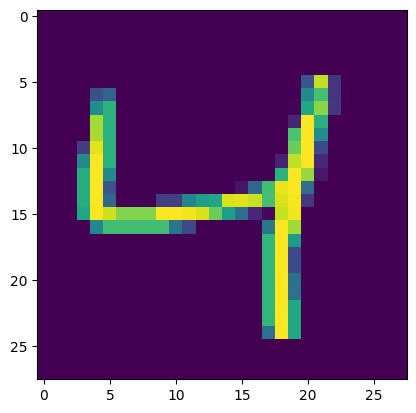

In [ ]:
plt.imshow(X_train[2])

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
X_train_reshaped = X_train.reshape(-1, 28, 28, 1)
X_test_reshaped = X_test.reshape(-1, 28, 28, 1)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(96, (5, 5), activation='relu', input_shape=(28,28,1), padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(96, (5, 5), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(80, (5, 5), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(layers.Conv2D(96, (5, 5), activation='relu', padding='same'))

In [ ]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_131 (Conv2D)         (None, 28, 28, 96)        2496      
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 14, 14, 96)        0         
 ng2D)                                                           
                                                                 
 dropout_43 (Dropout)        (None, 14, 14, 96)        0         
                                                                 
 conv2d_132 (Conv2D)         (None, 14, 14, 96)        230496    
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 7, 7, 96)          0         
 ng2D)                                                           
                                                                 
 dropout_44 (Dropout)        (None, 7, 7, 96)        

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_131 (Conv2D)         (None, 28, 28, 96)        2496      
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 14, 14, 96)        0         
 ng2D)                                                           
                                                                 
 dropout_43 (Dropout)        (None, 14, 14, 96)        0         
                                                                 
 conv2d_132 (Conv2D)         (None, 14, 14, 96)        230496    
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 7, 7, 96)          0         
 ng2D)                                                           
                                                                 
 dropout_44 (Dropout)        (None, 7, 7, 96)        

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=128, validation_data=(X_test_reshaped, y_test))

Epoch 1/10
469/469 [==============================] - 19s 24ms/step - loss: 0.3366 - accuracy: 0.8845 - val_loss: 0.0641 - val_accuracy: 0.9798
Epoch 2/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0684 - accuracy: 0.9796 - val_loss: 0.0351 - val_accuracy: 0.9887
Epoch 3/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0534 - accuracy: 0.9833 - val_loss: 0.0337 - val_accuracy: 0.9890
Epoch 4/10
469/469 [==============================] - 10s 20ms/step - loss: 0.0444 - accuracy: 0.9865 - val_loss: 0.0260 - val_accuracy: 0.9923
Epoch 5/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0373 - accuracy: 0.9887 - val_loss: 0.0254 - val_accuracy: 0.9922
Epoch 6/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0348 - accuracy: 0.9891 - val_loss: 0.0278 - val_accuracy: 0.9912
Epoch 7/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0339 - accuracy: 0.9892 - val_loss: 0.0226 - val_accuracy: 

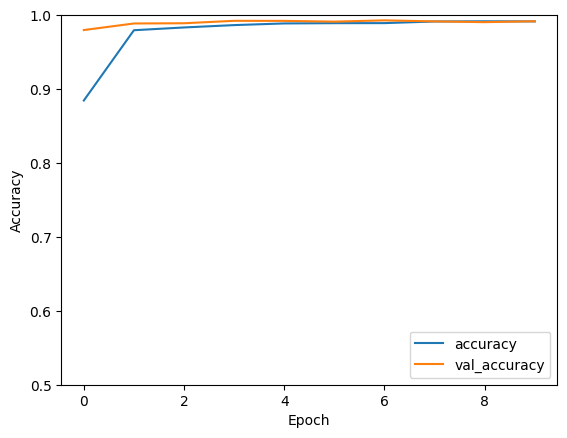

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
y_pred_probabilities = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_probabilities, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

313/313 [==============================] - 1s 3ms/step
Confusion Matrix:
[[ 979    0    0    0    0    0    0    1    0    0]
 [   1 1130    1    0    0    0    1    2    0    0]
 [   2    0 1029    0    0    0    0    1    0    0]
 [   0    0    3 1006    0    1    0    0    0    0]
 [   0    0    0    0  973    0    1    0    0    8]
 [   1    0    0    6    0  883    1    0    1    0]
 [   5    2    0    0    0    5  944    0    2    0]
 [   0    3    6    0    0    0    0 1017    1    1]
 [   3    1    3    1    0    1    0    0  962    3]
 [   0    1    0    4    2    2    0    4    2  994]]


In [ ]:
import cv2

image_path = "/content/IMG_20240529_104807.jpg"
image = cv2.imread(image_path)

resized_image = cv2.resize(image, (28, 28))
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
normalized_image = gray_image / 255.0

input_image = normalized_image.reshape(1, 28, 28, 1)

predicted_probabilities = model.predict(input_image)
predicted_class = np.argmax(predicted_probabilities)

print("Predicted Class:", predicted_class)


1/1 [==============================] - 0s 18ms/step
Predicted Class: 3


In [ ]:
image_path = "/content/IMG_20240529_104841.jpg"
image = cv2.imread(image_path)

resized_image = cv2.resize(image, (28, 28))
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
normalized_image = gray_image / 255.0

input_image = normalized_image.reshape(1, 28, 28, 1)

predicted_probabilities = model.predict(input_image)
predicted_class = np.argmax(predicted_probabilities)

print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 28ms/step
Predicted Class: 5


In [ ]:
image_path = "/content/IMG_20240529_104913.jpg"
image = cv2.imread(image_path)

resized_image = cv2.resize(image, (28, 28))
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
normalized_image = gray_image / 255.0

input_image = normalized_image.reshape(1, 28, 28, 1)

predicted_probabilities = model.predict(input_image)
predicted_class = np.argmax(predicted_probabilities)

print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 25ms/step
Predicted Class: 3
